# Exemplos de aulas

### Inferência Estatística

A quantidade de tempo, em minutos, que um passageiro gasta esperando na fila de checkin de um aeroporto é uma variável aleatória com média e variância desconhecidos e distribuição normal.

Supona que uma amostra aleatória de 10 passageiros foi observada, em que os tempos foram: t = [10, 9, 11, 8.5, 7.1, 9, 9.5, 8, 10, 7.8]

1. Encontre a estimativa da média e variância.

2. Essas estimativas são não viciadas?

In [1]:
import  numpy as np
from scipy import integrate, special
import matplotlib.pyplot as plt

In [25]:
class PointEstimation:
  def __init__(self, X: list) -> None:
    self.X = X
    self.N = len(X)

  def uniformMu(self, a: float, b: float) -> float:
    return (b + a) / 2

  def uniformVariance(self, a: float, b: float) -> float:
    return ((b - a) ** 2) / 12

  def binomialP(self) -> float:
    return np.sum(self.X) / self.N

  def poissonMu(self) -> float:
    return np.sum(self.X) / self.N

  def exponentialLambda(self) -> float:
    return 1 / (np.sum(self.X) / self.N)

  def normalMu(self) -> float:
    return np.sum(self.X) / self.N

  def normalVariance(self) -> float:
    mu = self.normalMu()
    sumSqr = np.sum([(x - mu)**2 for x in self.X])
    return (1 / (self.N - 1)) * sumSqr

In [26]:
t = [10, 9, 11, 8.5, 7.1, 9, 9.5, 8, 10, 7.8]
PE = PointEstimation(t)

mu = PE.normalMu()
var = PE.normalVariance()

print(mu)
print(var)

8.989999999999998
1.3943333333333332


#### Distribuições amostrais e Teorema Central Do Limite

In [10]:
class SampleDistribution:
  def __init__(self, N: int, mu: float = 0, sigmaSqr: float = 0) -> None:
    self.N = N
    self.mu = mu
    self.sigmaSqr = sigmaSqr

  def CLTsampleZ(self, x: float) -> float:
    normalFactor = 1/(np.sqrt(2 * self.sigmaSqr * np.pi))
    expFactor = np.exp(-(1/2) * (((x - self.mu) ** 2) / self.sigmaSqr))
    return normalFactor * expFactor

  def sampleStudentT(self, x: float) -> float:
    gammaNum = special.gamma((self.N + 1) / 2)
    gammaDenom = special.gamma(self.N / 2) * np.sqrt(np.pi * self.N)
    return (gammaNum / gammaDenom) * (1 + ((x ** 2) / self.N)) ** (-(self.N + 1) / 2)
  
  def sampleQuiSqr(self, x: float) -> float:
    if x < 0: return 0
    gammaDenom = special.gamma(self.N / 2) * (2 ** (self.N / 2))
    return (1/gammaDenom) * (x ** ((self.N / 2) - 1)) * np.exp(-(x/2))

  

In [58]:
N = 48
SD = SampleDistribution(N=N, mu=0*N, sigmaSqr=(1/12)*N)
SD.CLTsampleZ(0)

0.19947114020071635

Após arredondamento par ao inteiro mais próximo, 48 números são somados. Os erros de arredondamento individuais são uniformemente distribuídos no intervalo (-0.5, 0.5). 

Qual a probabilidade de que a soma dos números arredondados seja diferente da verdadeira soma por mais de 3 unidades (em ambos os sentidos)?

In [60]:
X = [-0.5, 0.5]
PE = PointEstimation(X)
mu = PE.uniformMu(X[0], X[1])
var = PE.uniformVariance(X[0], X[1])
print(mu, var)

N = 48
SD = SampleDistribution(N=N, mu=mu*N, sigmaSqr=var*N)
Z = integrate.quad(SD.CLTsampleZ, -np.inf, -3)[0] + integrate.quad(SD.CLTsampleZ, 3, np.inf)[0]
print(Z)

0.0 0.08333333333333333
0.13361440253770968


Calcular a probabilidade $P(T > 2.201)$ em uma amostra de tamanho $n = 12$ (Distribuição T de Student)

In [61]:
n = 12
SD = SampleDistribution(N=n-1)
T = integrate.quad(SD.sampleStudentT, 2.201, np.inf)[0]
print(T)

0.024999351976208672


Suponha que queremos determinar a proporção de sucessos $p$ de uma certa população. Logo, podemos definir uma variável aleatória de Bernoulli.

Assim, $\mu = E[X] = p$ e $\sigma^2 = Var[X] = p q = p (1 - p)$

O presidente de uma distribuidora acredita que 30\% das encomendas feitas na firma são provenientes de clientes que compram pela primeira vez. Suponha que o presidente esteja correto.

Uma amostra aleatória simples de 100 pedidos será usado para estimar a proporço de clientes que compram pela primeira vez.

1. Qual a distribuição amostral das proporções amostrais?

2. Qual a probabilidade da proporção amostral estar no intervalo (0.2, 0.4)?

0.1727406534372887


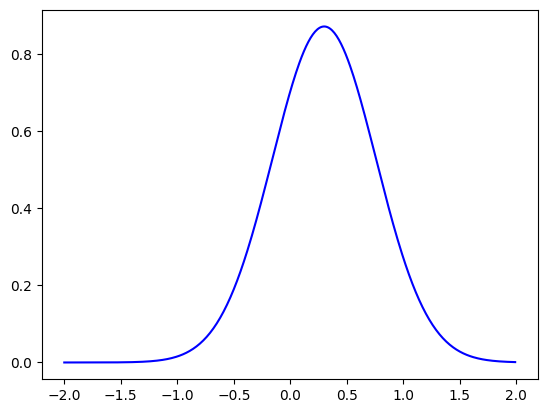

In [65]:
mu = 0.3
var = 0.3 * (1 - mu)
N = 100

SD = SampleDistribution(N=N, mu=mu, sigmaSqr=var)
Z = integrate.quad(SD.CLTsampleZ, 0.2, 0.4)[0]
print(Z)

t = np.arange(-2, 2, 0.01)
plt.plot(t, [SD.CLTsampleZ(i) for i in t], 'b-')
plt.show()

Calcule a probabilidade da estatística Q assumir um valor maior do que 20.48 quando $n = 11$

0.025025979934502042


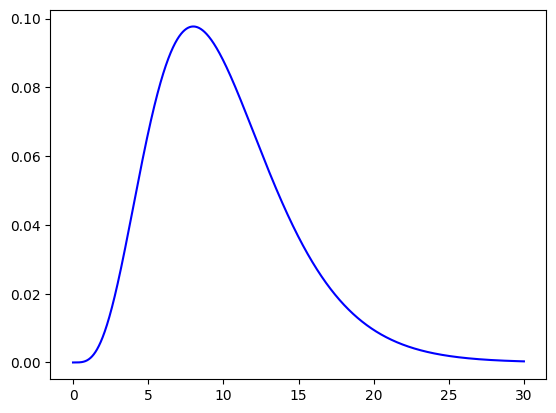

In [71]:
n = 11
mu = n
var = 2 * n

SD = SampleDistribution(N=n-1, mu=mu, sigmaSqr=var)
Q = integrate.quad(SD.sampleQuiSqr, 20.48, np.inf)[0]
print(Q)

t = np.arange(0, 30, 0.01)
plt.plot(t, [SD.sampleQuiSqr(i) for i in t], 'b-')
plt.show()

#### Intervalos de Confiança

In [97]:
class ConfidenceInterval:
  def __init__(self, N: int = 0, sampleMu: float = 0, sampleSigma: float = 1, confidenceCoeff: float = 0.95) -> None:
    self.N = N
    self.sampleSigma = sampleSigma
    self.sampleMu = sampleMu
    self.confidenceCoeff = confidenceCoeff
    self.SD = SampleDistribution(N=N, mu=0, sigmaSqr=1)

  def zScore(self) -> float:
    t0 = -5
    dt = 0.001
    cumSum = 0
    while cumSum < (1 - self.confidenceCoeff) / 2:
      I = integrate.quad(self.SD.CLTsampleZ, t0, t0+dt)[0]
      cumSum += I
      t0 += dt
    return t0
  
  def confidenceLimit(self) -> float:
    zScore = self.zScore()
    return abs(zScore * self.sampleSigma / np.sqrt(self.N))

  def sampleSizeEstimation(self, maxError: float) -> float:
    zScore = self.zScore()
    return ((zScore * self.sampleSigma / maxError) ** 2)


Em uma fábrica de cerveja a quantidade de cerveja em latas seguia uma distribuição normal com média 350 ml e desvio padrão 3ml. Após alguns problemas na linha de produção, suspeita-se que houve alteração na média. Uma amostra de 20 latas forneceu uma média de 346 ml. Obtenha um intervalo de 95\% para a quantidade média de cerveja envasada supondo que não tenha ocorrido alteração na variabilidade.

In [92]:
sampleMu = 346
N = 20
sigma = 3
confidenceCoeff = 0.95

CI = ConfidenceInterval(N=N, sampleSigma=sigma, confidenceCoeff=confidenceCoeff)
L = CI.confidenceLimit()
print(L)
print(sampleMu - L, sampleMu + L)

1.3141371503765533
344.68586284962345 347.31413715037655


Em uma siderúrgica estuda-se a resistência média de barras de aço utilizadas na construção civil. Qual o tamanho amostral necessário para garantir que um erro máximo de 8kg seja superado com probabilidade igual a 0.01? 

O desvio padrão da resistência para este tipo de barra é de 25 kg

In [101]:
maxError = 8
confidenceCoeff = 0.99
stdDev = 25

CI = ConfidenceInterval(confidenceCoeff=confidenceCoeff, sampleSigma=stdDev)
n = CI.sampleSizeEstimation(maxError=maxError)
print(n)

64.7521972656161
